# Classifying Neighborhoods of Toronto

In [23]:
#importing libraries
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
!pip install geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from geopy.exc import GeocoderNotFound
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import folium
from sklearn.cluster import KMeans

print('All Libraries have been imported')

All Libraries have been imported


In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [25]:
url='https://raw.githubusercontent.com/het-10/Coursera_Capstone/master/Data.csv'

In [26]:
df=pd.read_csv(url,error_bad_lines=False)
df.head()

,Neighbourhood,Neighbourhood Id,Total Area,Total Population,Pop - Males,Pop - Females,Pop 0 - 4 years,Pop 5 - 9 years,Pop 10 - 14 years,Pop 15 -19 years,Pop 20 - 24 years,Pop 25 - 29 years,Pop 30 - 34 years,Pop 35 - 39 years,Pop 40 - 44 years,Pop 45 - 49 years,Pop 50 - 54 years,Pop 55 - 59 years,Pop 60 - 64 years,Pop 65 - 69 years,Pop 70 - 74 years,Pop 75 - 79 years,Pop 80 - 84 years,Pop 85 years and over,Seniors 55 and over,Seniors 65 and over,Child 0-14,Youth 15-24,Home Language Category,Language - Chinese,Language - Italian,Language - Korean,Language - Persian (Farsi),Language - Portuguese,Language - Russian,Language - Spanish,Language - Tagalog,Language - Tamil,Language - Urdu
0,West Humber-Clairville,1,30.09,34100,17095,17000,1865,1950,2155,2550,2855,2755,2360,2175,2445,2545,2360,1975,1780,1345,1070,895,585,410,8095,4330,5960,5400,32215,475,925,95,160,205,15,1100,850,715,715
1,Mount Olive-Silverstone-Jamestown,2,4.60,32790,16015,16765,2575,2535,2555,2620,2400,2335,2355,2530,2500,2370,2050,1610,1360,1055,775,605,340,170,5935,2955,7665,5015,31140,275,750,60,350,115,50,820,345,1420,1075
2,Thistletown-Beaumond Heights,3,3.40,10140,4920,5225,575,580,670,675,675,675,600,640,745,780,690,565,515,420,370,405,290,260,2825,1740,1815,1350,9455,95,705,35,115,105,15,570,130,120,300
3,Rexdale-Kipling,4,2.50,10485,5035,5455,495,520,570,665,650,645,600,645,745,825,865,710,630,455,415,385,360,300,3245,1905,1590,1315,9855,95,475,30,95,145,30,700,180,70,215
4,Elms-Old Rexdale,5,2.90,9550,4615,4935,670,720,720,725,655,570,595,600,750,720,710,545,475,350,265,235,145,100,2110,1100,2110,1380,9190,90,510,55,285,80,30,670,195,60,140


In [27]:
df.drop(df.iloc[:,6:29 ],inplace=True,axis=1)
df.shape

(140, 16)

In [28]:
df.head()

,Neighbourhood,Neighbourhood Id,Total Area,Total Population,Pop - Males,Pop - Females,Language - Chinese,Language - Italian,Language - Korean,Language - Persian (Farsi),Language - Portuguese,Language - Russian,Language - Spanish,Language - Tagalog,Language - Tamil,Language - Urdu
0,West Humber-Clairville,1,30.09,34100,17095,17000,475,925,95,160,205,15,1100,850,715,715
1,Mount Olive-Silverstone-Jamestown,2,4.60,32790,16015,16765,275,750,60,350,115,50,820,345,1420,1075
2,Thistletown-Beaumond Heights,3,3.40,10140,4920,5225,95,705,35,115,105,15,570,130,120,300
3,Rexdale-Kipling,4,2.50,10485,5035,5455,95,475,30,95,145,30,700,180,70,215
4,Elms-Old Rexdale,5,2.90,9550,4615,4935,90,510,55,285,80,30,670,195,60,140


In [7]:
address= df['Neighbourhood'].apply(lambda x: x.split('-')[-1]+', ON, Canada').unique()
geolocater= Nominatim(user_agent="explorer")
location=[]
empty=[]

def getcoords(add):
    try:
        coords= geolocater.geocode(add, timeout=10)
        location.append([add, coords.latitude, coords.longitude])
        print("the coords are {}".format(location[-1]))
    
    except GeocoderTimedOut:
        return getcoords(add)
    
    except:
        empty.append([add])
        print("Couldn't find coords of {}".format(empty[-1]))
        
for add in address:
        getcoords(add)

the coords are ['Clairville, ON, Canada', 43.77349185, -79.65105070122215]
the coords are ['Jamestown, ON, Canada', 43.8108437, -81.1977428]
Couldn't find coords of ['Beaumond Heights, ON, Canada']
the coords are ['Kipling, ON, Canada', 43.6375928, -79.5354943]
the coords are ['Old Rexdale, ON, Canada', 43.7213619, -79.5655129]
the coords are ['The Westway, ON, Canada', 43.6887068, -79.5427032]
the coords are ['Richview, ON, Canada', 43.688589, -79.5428473]
the coords are ['Westmount, ON, Canada', 42.9510358, -81.2898857]
the coords are ['Humber Valley, ON, Canada', 43.6664717, -79.5243136]
the coords are ['Rosethorn, ON, Canada', 43.6584742, -79.53909744693016]
the coords are ['West Deane, ON, Canada', 43.6631995, -79.5685684]
the coords are ['Markland Wood, ON, Canada', 43.63123865, -79.58543401986114]
the coords are ['Etobicoke West Mall, ON, Canada', 43.6435491, -79.56532534553605]
the coords are ['City Centre West, ON, Canada', 43.5884987, -79.6441075]
the coords are ['Kingsway So

In [29]:
df_latlong=pd.DataFrame(location, columns=['Area','Latitude','Longitude'])
df_latlong.to_csv('area_location.csv')
df_latlong.head()

,Area,Latitude,Longitude
0,"Clairville, ON, Canada",43.773492,-79.651051
1,"Jamestown, ON, Canada",43.810844,-81.197743
2,"Kipling, ON, Canada",43.637593,-79.535494
3,"Old Rexdale, ON, Canada",43.721362,-79.565513
4,"The Westway, ON, Canada",43.688707,-79.542703


In [30]:
center1='Casa Loma,ON,Canada'
geolocater= Nominatim(user_agent="Casaloma")
center= geolocater.geocode(center1)
lat= center.latitude
lon= center.longitude
print('The coordinates for {} are given as {},{}'.format(center1,lat, lon))

The coordinates for Casa Loma,ON,Canada are given as 43.6781015,-79.409415775


In [31]:
Toronto_Map=folium.Map(location=[lat,lon],zoom_start=11)
for lat, long, area in zip(df_latlong['Latitude'], df_latlong['Longitude'],df_latlong['Area']):
    label=folium.Popup(area, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=1,
        popup=label,
        color='blue',
        fill=False,
        fill_color='blue',
        fill_opacity=1,
        parse_html=False).add_to(Toronto_Map)
    
Toronto_Map

In [57]:
Id = 'FJSKXOMOXZEZAVPKALEHMCENWWZJHL2FXJUOU30E32XDIW5Z'
Secret = 'N20ZINETH5NIKNRPK2YZREWCEN0IXDEOEKJEGQ34K4OUAZVM' 
Version = '20200711' 

In [58]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(Id,Secret,Version)
results = requests.get(categories_url).json()

In [59]:
len(results['response']['categories'])

10

In [60]:
categories_list = []
# Let's print only the top-level categories and their IDs and also add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)

Arts & Entertainment (4d4b7104d754a06370d81259)
College & University (4d4b7105d754a06372d81259)
Event (4d4b7105d754a06373d81259)
Food (4d4b7105d754a06374d81259)
Nightlife Spot (4d4b7105d754a06376d81259)
Outdoors & Recreation (4d4b7105d754a06377d81259)
Professional & Other Places (4d4b7105d754a06375d81259)
Residence (4e67e38e036454776db1fb3a)
Shop & Service (4d4b7105d754a06378d81259)
Travel & Transport (4d4b7105d754a06379d81259)


In [61]:
def get_venues_count(lat,long, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                Id, 
                Secret, 
                Version,
                lat,
                long,
                radius,
                categoryId)

    # make the GET request
    return requests.get(explore_url).json()['response']['totalResults']

In [62]:
df_venues = df_latlong.copy()
for c in categories_list:
    df_venues[c[0]] = 0
    
df_venues.head()

,Area,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,"Clairville, ON, Canada",43.773492,-79.651051,0,0,0,0,0,0,0,0,0,0
1,"Jamestown, ON, Canada",43.810844,-81.197743,0,0,0,0,0,0,0,0,0,0
2,"Kipling, ON, Canada",43.637593,-79.535494,0,0,0,0,0,0,0,0,0,0
3,"Old Rexdale, ON, Canada",43.721362,-79.565513,0,0,0,0,0,0,0,0,0,0
4,"The Westway, ON, Canada",43.688707,-79.542703,0,0,0,0,0,0,0,0,0,0


In [63]:
for i, row in df_venues.iterrows():
    for c in categories_list:        
        df_venues.loc[i, c[0]] = get_venues_count(df_venues.Latitude.iloc[i], df_venues.Longitude.iloc[i], radius=1000, categoryId=c[1])
    print(i)
    df_venues.to_csv('area_venues.csv')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106


KeyError: 'totalResults'

In [64]:
import pandas as pd
df_venues=pd.read_csv('area_venues.csv', index_col=0)
df_venues.head()

,Area,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,"Clairville, ON, Canada",43.773492,-79.651051,1,0,0,5,2,2,5,0,6,3
1,"Jamestown, ON, Canada",43.810844,-81.197743,0,0,0,0,0,0,0,0,0,0
2,"Kipling, ON, Canada",43.637593,-79.535494,8,3,0,38,8,4,22,6,28,6
3,"Old Rexdale, ON, Canada",43.721362,-79.565513,4,1,1,5,0,3,3,0,12,1
4,"The Westway, ON, Canada",43.688707,-79.542703,1,2,0,4,2,4,6,1,8,5


In [65]:
from sklearn.preprocessing import MinMaxScaler

X = df_venues.values[:,3:]
scaled_dataset = MinMaxScaler().fit_transform(X)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [66]:
df_scaled = pd.DataFrame(scaled_dataset)
df_scaled.columns = [c[0] for c in categories_list]
df_scaled.head()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.024390,0.000000,0.000000,0.022624,0.019048,0.027778,0.065789,0.000000,0.047244,0.046154
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.195122,0.037037,0.000000,0.171946,0.076190,0.055556,0.289474,0.136364,0.220472,0.092308
3,0.097561,0.012346,0.166667,0.022624,0.000000,0.041667,0.039474,0.000000,0.094488,0.015385
4,0.024390,0.024691,0.000000,0.018100,0.019048,0.055556,0.078947,0.022727,0.062992,0.076923


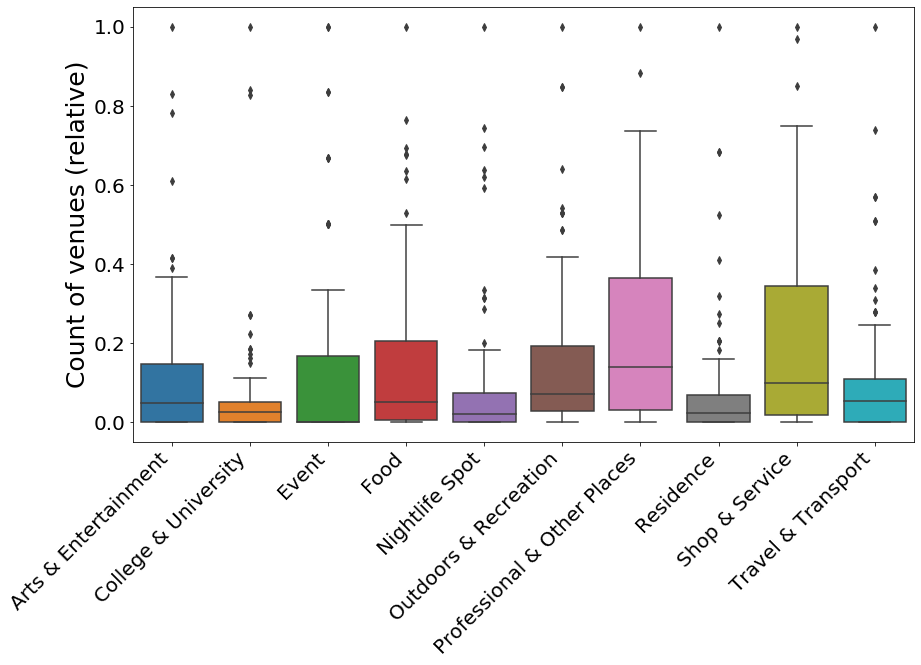

In [67]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(data = df_scaled)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [68]:

df_venues.drop('Event', 1, inplace=True)
categories_list.remove(('Event', '4d4b7105d754a06373d81259'))

In [69]:

# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_scaled)

kmeans_labels = kmeans.labels_

df_venues_clustered = df_venues.copy()
df_venues_clustered['Cluster'] = kmeans_labels

#dataframe to be used for box plot
df_scaled_clustered = df_scaled.copy()
df_scaled_clustered['Cluster'] = kmeans_labels

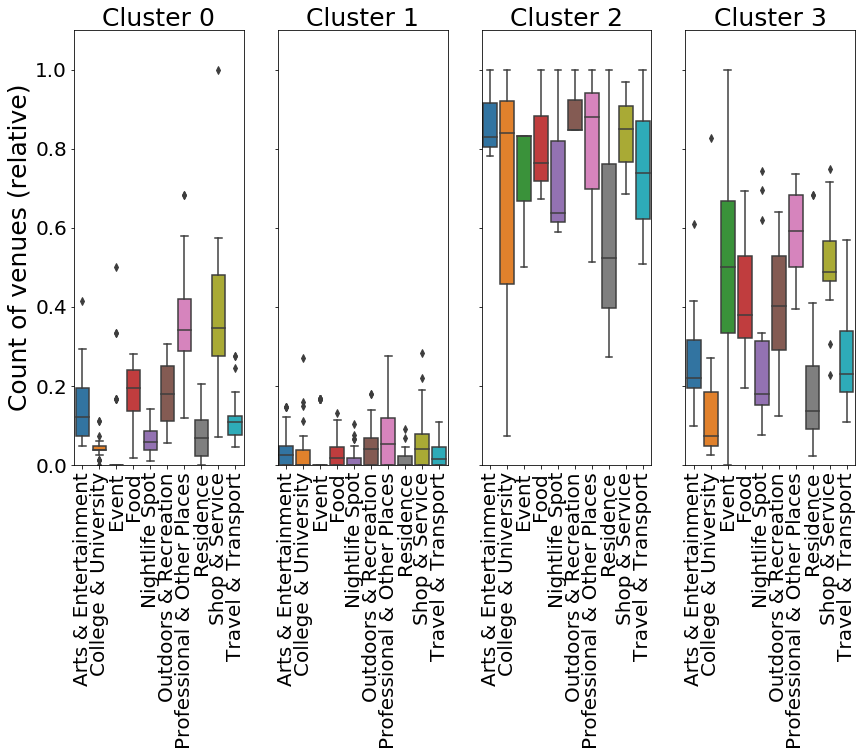

In [70]:
fig,axes= plt.subplots(1,kclusters,figsize=(14,8),sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(0, kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = df_scaled_clustered[df_scaled_clustered['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

In [71]:
Toronto_Map_New = folium.Map(location=[lat,lon],zoom_start=10)

#add markers
for i, area, lat, long, cluster in zip(df_venues_clustered.index,
                                         df_venues_clustered['Area'],
                                         df_venues_clustered['Latitude'],
                                         df_venues_clustered['Longitude'],
                                         df_venues_clustered['Cluster']):   
    #colors = sns.color_palette(None, kclusters).as_hex()
    colors=['blue','green','red','magenta']
    folium.CircleMarker(
        [lat,long],
        fill=True,
        fill_opacity=1,
        popup=folium.Popup(area, parse_html=True),
        radius=2,
        color=colors[cluster]
    ).add_to(Toronto_Map_New)
    
    
      
Toronto_Map_New

In [75]:
Population=['Total Population','Pop - Males','Pop - Females']
df_population=df.loc[:,Population]
df_population['Area']=df['Neighbourhood']
df_population.shape

(140, 4)

In [76]:
df_population.head()

,Total Population,Pop - Males,Pop - Females,Area
0,34100,17095,17000,West Humber-Clairville
1,32790,16015,16765,Mount Olive-Silverstone-Jamestown
2,10140,4920,5225,Thistletown-Beaumond Heights
3,10485,5035,5455,Rexdale-Kipling
4,9550,4615,4935,Elms-Old Rexdale


In [77]:
df_population=df_population.groupby('Area').sum()
df_population.reset_index(inplace=True)

# Format area column. Will be useful for merging dataframes later
df_population['Area']=df_population['Area'].apply(lambda x: x.split('-')[-1]+', ON, Canada')

In [78]:
df_all= df_venues_clustered.merge(df_population, on='Area', how='left')

In [79]:
df_all.shape

(133, 16)

In [81]:
df_all.head()

,Area,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster,Total Population,Pop - Males,Pop - Females
0,"Clairville, ON, Canada",43.773492,-79.651051,1,0,5,2,2,5,0,6,3,1,34100,17095,17000
1,"Jamestown, ON, Canada",43.810844,-81.197743,0,0,0,0,0,0,0,0,0,1,32790,16015,16765
2,"Kipling, ON, Canada",43.637593,-79.535494,8,3,38,8,4,22,6,28,6,0,10485,5035,5455
3,"Old Rexdale, ON, Canada",43.721362,-79.565513,4,1,5,0,3,3,0,12,1,1,9550,4615,4935
4,"The Westway, ON, Canada",43.688707,-79.542703,1,2,4,2,4,6,1,8,5,1,21725,10310,11415


In [88]:
map_clusters=folium.Map(location=[lat,lon],zoom_start=10)

#add markers
for area, lat, long, cluster in zip(df_venues_clustered['Area'],
                                    df_venues_clustered['Latitude'],
                                    df_venues_clustered['Longitude'],
                                    df_venues_clustered['Cluster']):   
    #colors = sns.color_palette(None, kclusters).as_hex()
    colors=['blue','green','red','cyan']
    folium.CircleMarker(
        [lat,long],
        fill=True,
        fill_opacity=1,
        radius=2,
        color=colors[cluster]
    ).add_to(map_clusters)
    
for lat, long, area, rad in zip(df_all['Latitude'], 
                                df_all['Longitude'],
                                df_all['Area'],
                                df_all['Total Population']):
    label=folium.Popup('{}, {}%'.format(area,rad*100), parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=4+rad*3,
        popup=label,
        color='orange',
        fill=False,
        weight=1.5,
        parse_html=False).add_to(map_clusters)
    
map_clusters